<a href="https://colab.research.google.com/github/jiyoung-99/ML_practice/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

In [2]:
boston_df = load_boston()
df = pd.DataFrame(boston_df.data, columns=boston_df.feature_names)

In [3]:
df['Price'] = boston_df.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


0
1
2
3
4
5
6
7


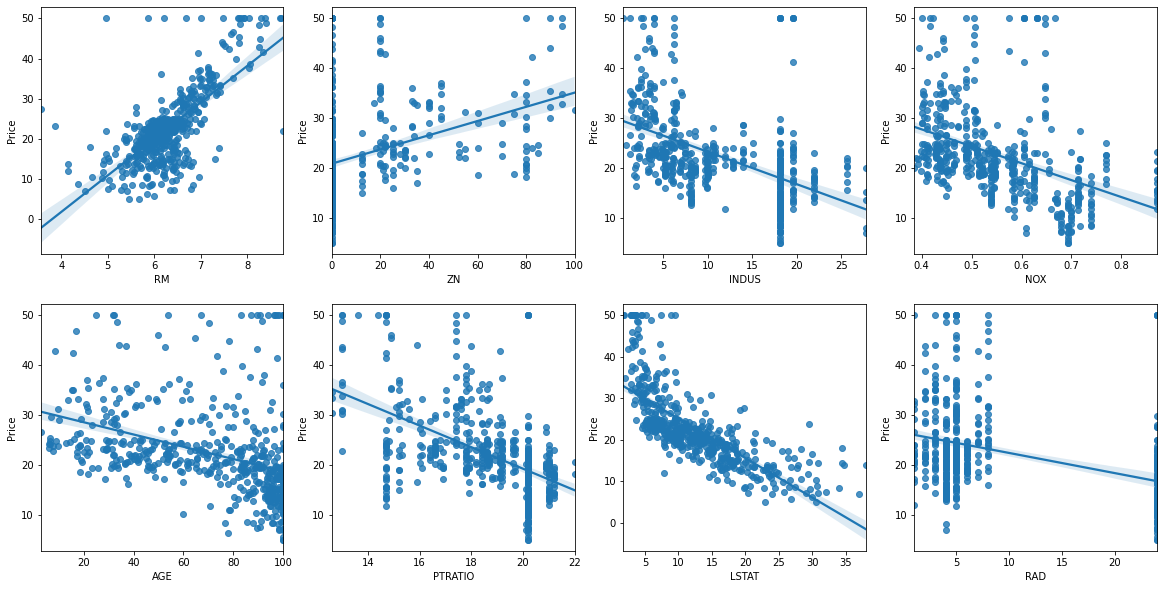

In [4]:
fig, axs = plt.subplots(figsize=(20, 10), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    print(i)
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='Price', data=df, ax=axs[row][col])

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, r2_score

df_target = df['Price']
df_feature = df.drop(columns='Price')

x_train, x_test, y_train, y_test = train_test_split(df_feature, df_target, test_size=0.3)

In [6]:
liner = LinearRegression()
liner.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_preds = liner.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

In [8]:
print('MSE : {0: .3f}, RMSE : {1: .3f}'.format(mse, rmse))

MSE :  22.029, RMSE :  4.693


In [9]:
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_preds)))

Variance score :  0.669


In [10]:
print('절편 : {0: .3f}'.format(liner.intercept_))
print('회귀계수값 {0: .3f}', np.round(liner.coef_))

절편 :  27.430
회귀계수값 {0: .3f} [ -0.   0.   0.   3. -18.   5.  -0.  -1.   0.  -0.  -1.   0.  -0.]


In [11]:
coeff = pd.Series(data=np.round(liner.coef_, 1), index=df_feature.columns)
coeff.sort_values(ascending=True)

NOX       -18.5
DIS        -1.5
PTRATIO    -0.9
LSTAT      -0.4
CRIM       -0.1
ZN          0.0
INDUS       0.0
AGE        -0.0
TAX        -0.0
B           0.0
RAD         0.3
CHAS        3.1
RM          4.9
dtype: float64

In [16]:
from sklearn.model_selection import cross_val_score

df_target = df['Price']
df_feature = df.drop(columns='Price')
liner = LinearRegression()

# cross_val_score() 로 5 fold set 로 mse 구한 후 rmse 구함
neg_mse_scores = cross_val_score(liner, df_feature, df_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [17]:
print(' 5 fold MSE', np.round(neg_mse_scores, 2))
print(' 5 fold RMSE', np.round(rmse_scores, 2))
print(' 5 fold Average RMSE', np.round(avg_rmse, 2))

 5 fold MSE [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 fold RMSE [3.53 5.1  5.75 8.99 5.77]
 5 fold Average RMSE 5.83
